# **Chapter 4: Training Models**

## **1. Pendahuluan**

Di bab-bab sebelumnya, kita sering memperlakukan model Machine Learning seperti "kotak hitam" (*black boxes*). Kita memasukkan data dan mendapatkan prediksi tanpa benar-benar membedah bagaimana algoritma tersebut bekerja di dalamnya.

**Mengapa kita perlu memahami cara kerjanya?**
Meskipun kita bisa menggunakan Scikit-Learn tanpa tahu detail implementasinya, memahami apa yang ada "di balik layar" sangat penting untuk:
* Memilih model yang tepat untuk masalah tertentu.
* Memilih algoritma pelatihan dan *hyperparameters* yang optimal.
* Melakukan *debugging* dan analisis kesalahan (*error analysis*) secara efisien.

Dalam bab ini, kita akan membongkar model-model tersebut, dimulai dari **Linear Regression** hingga **Softmax Regression**. Kita akan melihat dua pendekatan utama dalam pelatihan model:
1.  **Closed-form equation:** Menghitung parameter optimal secara langsung menggunakan rumus matematika.
2.  **Iterative optimization (Gradient Descent):** Mengubah parameter secara bertahap untuk meminimalkan *cost function*.

## **2. Linear Regression**

### **Model Representasi**

Secara umum, model linear membuat prediksi dengan menghitung jumlah bobot (*weighted sum*) dari fitur input ditambah dengan konstanta yang disebut *bias term* (atau *intercept*).

Persamaan model Linear Regression (Bentuk Vektor):
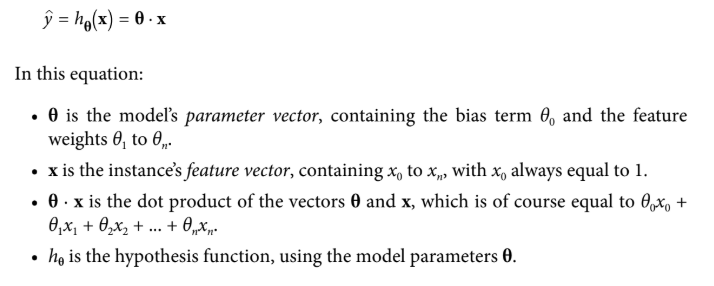

### **Cost Function (MSE)**

Untuk melatih model, kita perlu mengukur seberapa buruk performa model tersebut. Pada regresi, ukuran yang umum digunakan adalah **Mean Squared Error (MSE)**. Kita mencari nilai $\\theta$ yang meminimalkan MSE.
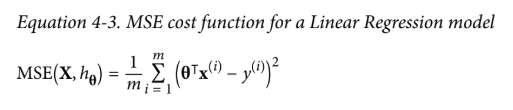

### **The Normal Equation**

Untuk menemukan nilai $\\theta$ yang meminimalkan cost function secara langsung, kita dapat menggunakan persamaan matematika yang disebut **Normal Equation**.

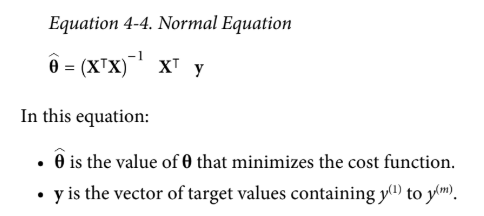

Mari kita coba buat data linear tiruan untuk menguji persamaan ini.

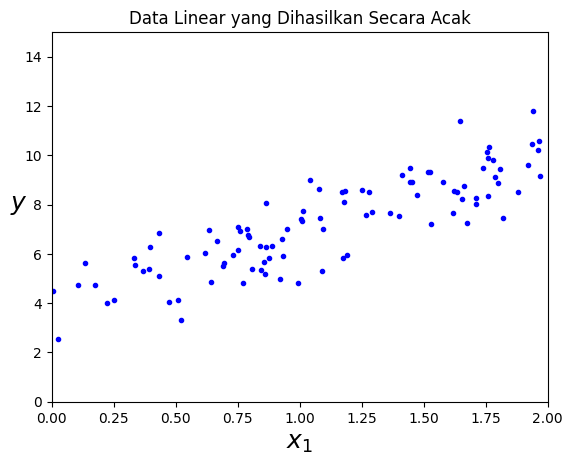

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data linear dengan noise random
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + Gaussian noise

# Visualisasi data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title("Data Linear yang Dihasilkan Secara Acak")
plt.show()

In [2]:
# Menghitung Theta menggunakan Normal Equation
# Kita perlu menambahkan x0 = 1 ke setiap instance (bias term)
X_b = np.c_[np.ones((100, 1)), X] 

# Menggunakan np.linalg.inv untuk invers matriks
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Theta terbaik hasil kalkulasi manual:")
print(theta_best)

Theta terbaik hasil kalkulasi manual:
[[3.87870707]
 [3.04347338]]


**Analisis Hasil:**
Kita menggunakan fungsi $y = 4 + 3x_1 + Gaussian Noise. Kita mengharapkan theta 0= 4$ dan theta 1 = 3$. Hasil yang kita dapatkan biasanya cukup dekat (misal 4.21 dan 2.77), tetapi tidak persis karena adanya *noise*.

Sekarang mari kita buat prediksi menggunakan theta topi tersebut:

Prediksi:
[[3.87870707]
 [9.96565383]]


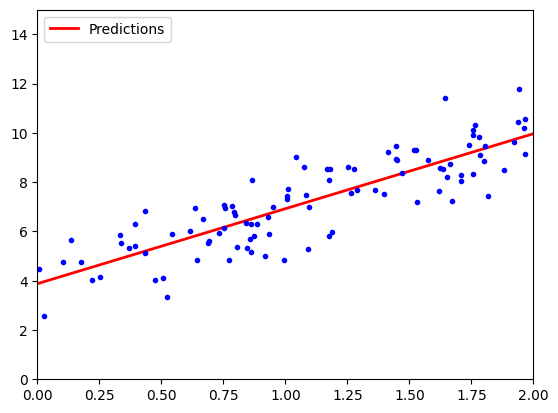

In [3]:
# Prediksi untuk nilai baru
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # tambah bias term
y_predict = X_new_b.dot(theta_best)

print("Prediksi:")
print(y_predict)

# Plot prediksi
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.show()

### **Menggunakan Scikit-Learn**
Implementasi di atas adalah apa yang terjadi "di balik layar".

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Intercept (bias):", lin_reg.intercept_)
print("Coef (weights):", lin_reg.coef_)

# Prediksi harus sama persis dengan kalkulasi manual kita
print("Prediksi Scikit-Learn:", lin_reg.predict(X_new))

Intercept (bias): [3.87870707]
Coef (weights): [[3.04347338]]
Prediksi Scikit-Learn: [[3.87870707]
 [9.96565383]]


## **3. Gradient Descent**

Gradient Descent adalah algoritma optimisasi generik yang bertujuan untuk men-tweak parameter secara iteratif guna meminimalkan *cost function*[cite: 157, 158].

**Analogi:** Bayangkan kita tersesat di pegunungan saat kabut tebal. Kita hanya bisa merasakan kemiringan tanah di bawah kaki. Strategi terbaik untuk cepat sampai ke lembah adalah melangkah ke arah kemiringan yang paling curam.

Parameter penting dalam GD adalah **Learning Rate** (ukuran langkah).
* Jika terlalu kecil: Konvergensi lambat (butuh waktu lama).
* Jika terlalu besar: Bisa melompati lembah dan menjadi divergen (gagal menemukan solusi).

Gradient Descent menjamin kita mendekati minimum global jika fungsi biayanya konveks (seperti MSE pada Linear Regression). Penting juga untuk melakukan **Feature Scaling** agar konvergensi lebih cepat.

### **Batch Gradient Descent**
Metode ini menggunakan **seluruh data training** pada setiap langkah untuk menghitung gradien.

Rumus Gradien Vector:
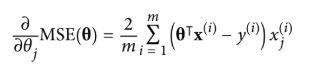



In [5]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # inisialisasi random

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("Theta dari Batch Gradient Descent:")
print(theta)

Theta dari Batch Gradient Descent:
[[3.87870707]
 [3.04347338]]


### **Stochastic Gradient Descent (SGD)**

Masalah utama Batch GD adalah lambat jika datanya sangat besar. **Stochastic GD** mengambil satu instance secara acak pada setiap langkah dan menghitung gradien hanya berdasarkan instance tersebut.
* **Kelebihan:** Sangat cepat, bisa menangani dataset raksasa.
* **Kekurangan:** Tidak stabil (stokastik), nilai cost akan memantul naik-turun dan tidak pernah benar-benar diam di minimum.
Solusinya adalah menggunakan **Learning Schedule**: mengurangi learning rate secara bertahap (mulai besar, lalu mengecil).

In [6]:
# Implementasi SGD Sederhana dengan Learning Schedule
n_epochs = 50
t0, t1 = 5, 50  # hyperparameter learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # inisialisasi random

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("Theta dari Stochastic Gradient Descent:")
print(theta)

Theta dari Stochastic Gradient Descent:
[[3.89454835]
 [3.02126778]]


Di Scikit-Learn, kita bisa menggunakan `SGDRegressor`:

In [7]:
from sklearn.linear_model import SGDRegressor

# max_iter=1000 epochs, tol=1e-3 (berhenti jika loss tidak turun), penalty=None
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print("SGD Scikit-Learn Intercept & Coef:")
print(sgd_reg.intercept_, sgd_reg.coef_)

SGD Scikit-Learn Intercept & Coef:
[3.87102541] [3.11674917]


## **4. Polynomial Regression**

Bagaimana jika data kita lebih kompleks dari sekadar garis lurus? Kita bisa menggunakan model linear untuk menyesuaikan data non-linear dengan cara menambahkan pangkat dari setiap fitur sebagai fitur baru.

Mari kita buat data kuadratik sederhana:

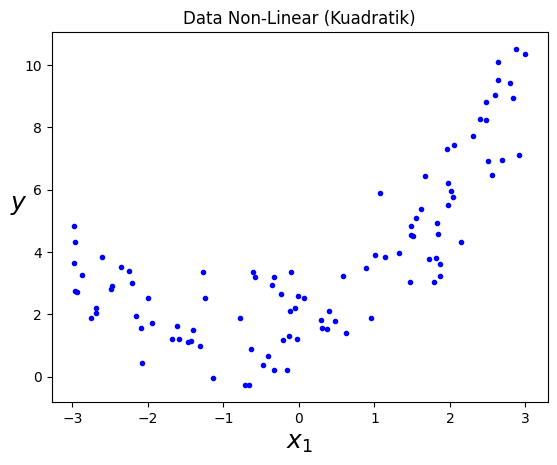

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # Persamaan Kuadratik

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Data Non-Linear (Kuadratik)")
plt.show()

Kita akan menggunakan `PolynomialFeatures` dari Scikit-Learn untuk mentransformasi data pelatihan, menambahkan kuadrat dari setiap fitur.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2 akan menambahkan fitur x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print("X original[0]:", X[0])
print("X poly[0]:", X_poly[0])  # Berisi [x, x^2]

# Sekarang kita fit Linear Regression pada data yang sudah diperluas (extended)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intercept & Coef:", lin_reg.intercept_, lin_reg.coef_)

X original[0]: [0.29734351]
X poly[0]: [0.29734351 0.08841316]
Intercept & Coef: [1.74866945] [[0.99475656 0.54609027]]


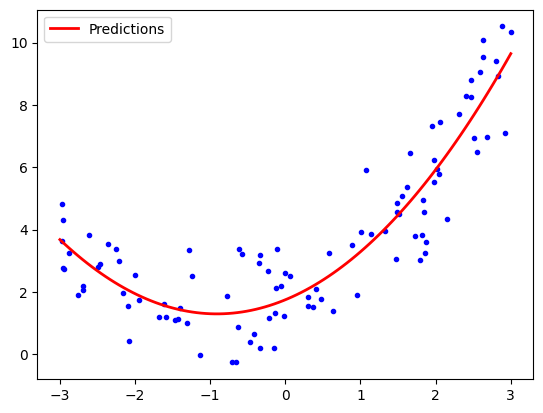

In [10]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.legend()
plt.show()

## **5. Learning Curves (Kurva Pembelajaran)**

Bagaimana kita tahu jika model kita *overfitting* atau *underfitting*? Salah satu caranya adalah melihat **Learning Curves**: plot performa model pada training set dan validation set sebagai fungsi dari ukuran training set[cite: 496].

* **Underfitting:** Kedua kurva (train & val) mencapai *plateau* (datar), berdekatan, tetapi error-nya cukup tinggi
* **Overfitting:** Error pada training set jauh lebih rendah daripada validation set (ada celah/gap di antara kurva)

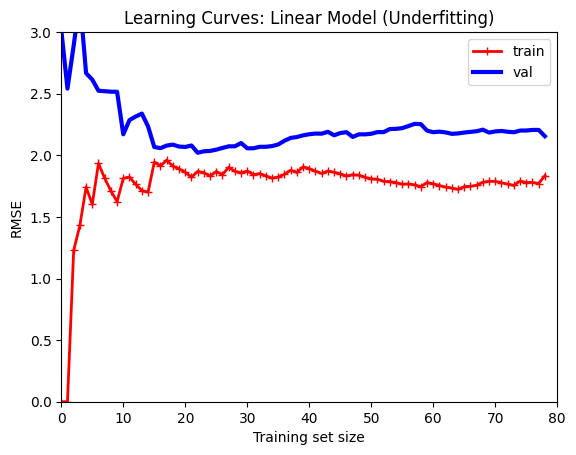

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

# Cek Learning Curve untuk Linear Regression (Underfitting pada data kuadratik)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.title("Learning Curves: Linear Model (Underfitting)")
plt.axis([0, 80, 0, 3])
plt.show()

### **The Bias/Variance Trade-off**

Kesalahan generalisasi model dapat dipecah menjadi tiga[cite: 573]:
1.  **Bias:** Kesalahan akibat asumsi yang salah (misal: menganggap data linear padahal kuadratik). High bias $\\rightarrow$ Underfitting.
2.  **Variance:** Sensitivitas berlebih terhadap variasi kecil di data training. High variance $\\rightarrow$ Overfitting.
3.  **Irreducible Error:** Kesalahan akibat noise pada data itu sendiri.

## **6. Regularized Linear Models**

Untuk mengurangi *overfitting*, kita bisa melakukan **Regularisasi** (membatasi kebebasan model). Untuk model linear, ini biasanya dilakukan dengan membatasi bobot model.

### **Ridge Regression ($l_2$ Regularization)**

Menambahkan *regularization term* ke cost function sebesar

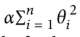 

Ini memaksa bobot model sekecil mungkin.

**Penting:** Data harus di-skala-kan (StandardScaler) sebelum Regularisasi.

In [13]:
from sklearn.linear_model import Ridge

# Menggunakan solver 'cholesky' (closed-form)
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print("Prediksi Ridge:", ridge_reg.predict([[1.5]]))

Prediksi Ridge: [5.05899033]


### **Lasso Regression ($l_1$ Regularization)**

**Karakteristik Unik:** Lasso cenderung mengeleminasi bobot fitur yang tidak penting (membuatnya nol). Ini secara otomatis melakukan **Feature Selection** dan menghasilkan *sparse model*.

In [14]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print("Prediksi Lasso:", lasso_reg.predict([[1.5]]))

Prediksi Lasso: [5.02262561]


### **Elastic Net**

Merupakan gabungan antara Ridge dan Lasso. Kita bisa mengontrol rasio campurannya ($r$).
* Jika $r=0$, sama dengan Ridge.
* Jika $r=1$, sama dengan Lasso.

In [15]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print("Prediksi Elastic Net:", elastic_net.predict([[1.5]]))

Prediksi Elastic Net: [5.02354724]


## **7. Logistic Regression**

Meskipun namanya "Regression", algoritma ini digunakan untuk **Klasifikasi** (memprediksi probabilitas instance masuk ke kelas tertentu).

### **Estimasi Probabilitas**


Logistic Regression menghitung weighted sum dari input (seperti Linear Regression), lalu memasukkannya ke fungsi **Sigmoid** ($\sigma$).

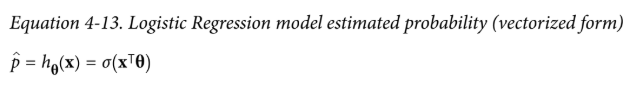

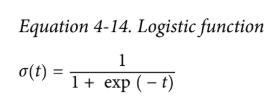

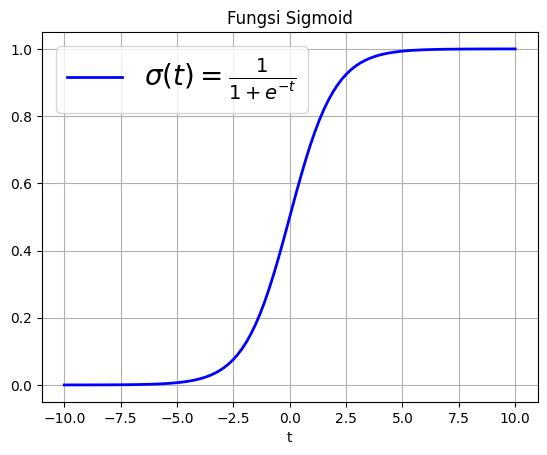

In [16]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.title("Fungsi Sigmoid")
plt.grid(True)
plt.show()

### **Cost Function (Log Loss)**

Fungsi biaya untuk Logistic Regression adalah **Log Loss**. Tidak ada *closed-form equation* untuk meminimalkan ini, tetapi karena fungsinya konveks, kita bisa menggunakan Gradient Descent.

### **Decision Boundaries (Studi Kasus Iris Dataset)**

Mari kita gunakan dataset Iris untuk mendeteksi tipe **Iris Virginica** berdasarkan lebar petal (*petal width*)

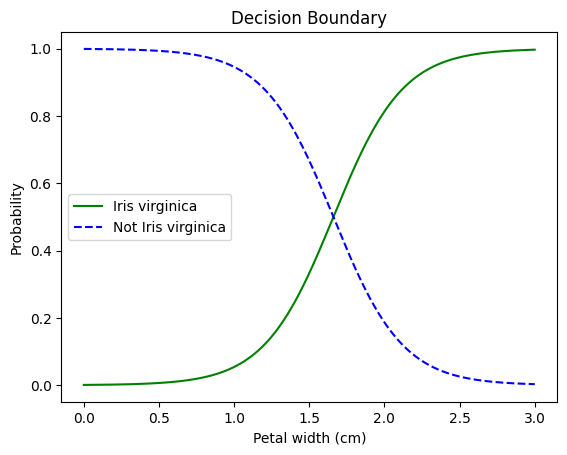

In [17]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 jika Iris-Virginica, 0 jika bukan

log_reg = LogisticRegression()
log_reg.fit(X, y)

# Visualisasi probabilitas
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.title("Decision Boundary")
plt.show()

Perhatikan bahwa *decision boundary* berada di sekitar 1.6 cm, di mana probabilitas kedua kelas adalah 50%. Jika lebar petal > 1.6 cm, model memprediksi Iris Virginica.

## **8. Softmax Regression**

Logistic Regression dapat digeneralisasi untuk mendukung **multiclass classification** secara langsung (tanpa perlu melatih banyak binary classifier). Ini disebut **Softmax Regression** atau Multinomial Logistic Regression.

Idenya adalah menghitung skor untuk setiap kelas $k$, lalu menerapkan **Softmax Function** untuk mendapatkan probabilitas.

Model memprediksi kelas dengan probabilitas tertinggi. Untuk pelatihan, ia meminimalkan fungsi biaya **Cross Entropy**.

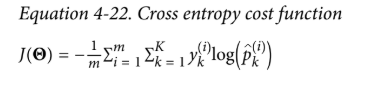

In [19]:
# Menggunakan Softmax Regression pada seluruh kelas Iris
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# multi_class="multinomial" mengaktifkan Softmax Regression
# solver="lbfgs" mendukung Softmax
softmax_reg = LogisticRegression(solver="lbfgs", C=10)
softmax_reg.fit(X, y)

# Prediksi contoh bunga dengan petal length 5cm dan width 2cm
print("Prediksi Kelas:", softmax_reg.predict([[5, 2]]))
print("Probabilitas:", softmax_reg.predict_proba([[5, 2]]))

Prediksi Kelas: [2]
Probabilitas: [[6.21626373e-07 5.73689802e-02 9.42630398e-01]]


## **Kesimpulan**


Di bab ini, kita telah membuka "kotak hitam" algoritma Machine Learning:
1.  **Linear Regression:** Kita bisa menyelesaikannya dengan persamaan tertutup (Normal Equation) atau optimisasi iteratif (Gradient Descent).
2.  **Gradient Descent:** Batch GD (akurat tapi lambat), Stochastic GD (cepat tapi tidak stabil), dan Mini-batch GD (seimbang).
3.  **Polynomial Regression:** Menangani data non-linear dengan memperluas fitur.
4.  **Regularisasi:** Menggunakan Ridge, Lasso, dan Elastic Net untuk mencegah overfitting dengan menekan bobot model.
5.  **Logistic & Softmax Regression:** Menggunakan prinsip regresi untuk klasifikasi biner dan multiclass.